# AlBert for Nepali (NepCov19Tweets) Sentiment Analysis.
**Sentiment Analysis on NepCov19Tweets Dataset, a collection of tweets in Nepali (Devnagari Script) regarding/during pandemic period.**

In [1]:
!pip install transformers datasets --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 128.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import random
import os
import tensorflow as tf
from transformers import set_seed

rand_seed = 99

def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.keras.utils.set_random_seed(seed)
    set_seed(seed)
    
seed_everything(rand_seed)

## Model Selection and Preparation

### Loading Model
**and model hyper-parameter tuning**

In [3]:
from transformers import TFAlbertForSequenceClassification 

model = TFAlbertForSequenceClassification.from_pretrained('Shushant/nepaliBERT', from_pt=True,
            id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
            label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2})

You are using a model of type bert to instantiate a model of type albert. This is not supported for all configurations of models and can yield errors.


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertForSequenceClassification: ['bert.encoder.layer.1.attention.output.dense.weight', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.4.attention.self.key.bias', 'bert.encoder.layer.10.output.dense.weight', 'bert.encoder.layer.11.attention.self.query.weight', 'bert.encoder.layer.1.intermediate.dense.bias', 'bert.encoder.layer.11.attention.output.LayerNorm.bias', 'bert.encoder.layer.9.attention.output.LayerNorm.bias', 'bert.encoder.layer.1.attention.output.LayerNorm.weight', 'bert.encoder.layer.5.attention.self.query.bias', 'bert.encoder.layer.5.attention.output.dense.weight', 'bert.encoder.layer.5.output.LayerNorm.bias', 'bert.encoder.layer.2.attention.output.LayerNorm.bias', 'bert.encoder.layer.2.output.dense.bias', 'bert.encoder.layer.4.attention.self.value.bias', 'bert.encoder.layer.7.attention.self.key.bias', 'bert.encoder.layer.4.output.LayerNorm.bias', 'bert.encoder.layer.

In [4]:
# ## Manual Transfer of BERT to ALBERT
# from transformers import TFAutoModelForSequenceClassification

# model = TFAutoModelForSequenceClassification.from_pretrained('albert-base-v2',
#             id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
#             label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2})

# bert_model = TFAutoModelForSequenceClassification.from_pretrained('Shushant/nepaliBERT',from_pt=True)

# transfer_weights = bert_model.bert.get_weights()[:25]
# albert_weights = np.array(model.albert.get_weights())
# for i in range(25):
#     transfer_weights[i] = np.resize(transfer_weights[i],albert_weights[i].shape)
    
# ### Transfer Learning From BERT to AlBert
# model.albert.set_weights(transfer_weights)

In [5]:
from transformers import AlbertTokenizerFast

tokenizer = AlbertTokenizerFast.from_pretrained('raygx/Covid-News-Headline-Generator')

model.resize_token_embeddings(len(tokenizer))

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'PreTrainedTokenizerFast'. 
The class this function is called from is 'AlbertTokenizerFast'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
print(model.summary())
model.config

Model: "tf_albert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 albert (TFAlbertMainLayer)  multiple                  11683712  
                                                                 
 dropout_4 (Dropout)         multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 11,686,019
Trainable params: 11,686,019
Non-trainable params: 0
_________________________________________________________________
None


AlbertConfig {
  "_name_or_path": "Shushant/nepaliBERT",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 2,
  "classifier_dropout": null,
  "classifier_dropout_prob": 0.1,
  "embedding_size": 128,
  "eos_token_id": 3,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEUTRAL",
    "1": "POSITIVE",
    "2": "NEGATIVE"
  },
  "initializer_range": 0.02,
  "inner_group_num": 1,
  "intermediate_size": 3072,
  "label2id": {
    "NEGATIVE": 2,
    "NEUTRAL": 0,
    "POSITIVE": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "albert",
  "num_attention_heads": 12,
  "num_hidden_groups": 1,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.29.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30001
}

### Optimizer Selection and Hyperparameter Tuning

In [7]:
from transformers import create_optimizer, AdamWeightDecay

optimizer = AdamWeightDecay(learning_rate=9e-6, weight_decay_rate=0.001)
model.compile(optimizer=optimizer)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


# Dataset Selection and Prepartion

**Loading Dataset**

In [8]:
import datasets

data = datasets.load_dataset("raygx/NepCov19TweetsPlus")
data = data.shuffle(rand_seed)
data = data['train'].train_test_split(test_size=0.2)
data = data.rename_columns({"Sentences":"text","Sentiment":"labels"})
data

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/41550 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/raygx___parquet/raygx--NepCov19TweetsPlus-ce0effd6da77cd1f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 33240
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 8310
    })
})

### Label Encoding

In [9]:
%%time
def LabelEncoding(x):
    if x['labels']==0:
        x['labels'] = 0#[1,0,0]
    if x['labels']==1:
        x['labels'] =  1#[0,1,0]
    if x['labels']==-1:
        x['labels'] =  2#[0,0,1]
    
    return x

data = data.map(
        LabelEncoding,
        num_proc=4)

data

Map (num_proc=4):   0%|          | 0/33240 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/8310 [00:00<?, ? examples/s]

CPU times: user 316 ms, sys: 336 ms, total: 652 ms
Wall time: 6.48 s


DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 33240
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 8310
    })
})

### Tokenization

In [10]:
%%time

def preprocess_function(rows):
    return globals()['tokenizer'](rows['text'],truncation=True)

print("Tokenizing the data")
tokenized_inputs = data.map(
    preprocess_function,
    batched=True,
    num_proc=2,
    remove_columns=data["train"].column_names,
)
tokenized_inputs = tokenized_inputs.remove_columns(['token_type_ids'])

tokenized_inputs['train'] = tokenized_inputs['train'].add_column(
    name="labels",column=data['train']['labels']
)
tokenized_inputs['test'] = tokenized_inputs['test'].add_column(
    name="labels",column=data['test']['labels']
)

tokenized_inputs

Tokenizing the data


Map (num_proc=2):   0%|          | 0/33240 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map (num_proc=2):   0%|          | 0/8310 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


CPU times: user 479 ms, sys: 229 ms, total: 708 ms
Wall time: 11.5 s


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 33240
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 8310
    })
})

### Initializing the Data Collator

In [11]:
from transformers import DataCollatorWithPadding

print("Initializing Data Collator")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, 
                                        max_length=128,
                                        return_tensors="tf")

Initializing Data Collator


In [12]:
print("Preparing Training and Testing sets to TRAIN the MODEL")
tf_train_set = model.prepare_tf_dataset(
    tokenized_inputs["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_inputs["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

You're using a AlbertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Preparing Training and Testing sets to TRAIN the MODEL


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2382: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


## Training and Evaluation

In [13]:
%%time

n_epoch = 5

print("Training the model")
history = model.fit(x=tf_train_set, 
          validation_data=tf_test_set,
          epochs=n_epoch)
print(history.history)

Training the model
Epoch 1/5
2077/2077 [==============================] - 398s 182ms/step - loss: 0.8203 - val_loss: 0.7163
Epoch 2/5
2077/2077 [==============================] - 375s 180ms/step - loss: 0.6646 - val_loss: 0.6593
Epoch 3/5
2077/2077 [==============================] - 381s 184ms/step - loss: 0.5929 - val_loss: 0.6108
Epoch 4/5
2077/2077 [==============================] - 382s 184ms/step - loss: 0.5353 - val_loss: 0.6200
Epoch 5/5
2077/2077 [==============================] - 372s 179ms/step - loss: 0.4891 - val_loss: 0.6214
{'loss': [0.8203331232070923, 0.6646356582641602, 0.5928552746772766, 0.5353360772132874, 0.48907047510147095], 'val_loss': [0.7163494825363159, 0.6592704653739929, 0.6107972860336304, 0.6199734210968018, 0.6214281916618347]}
CPU times: user 25min 47s, sys: 1min 59s, total: 27min 47s
Wall time: 33min 10s


**Loss Graph Visualization**

<Axes: >

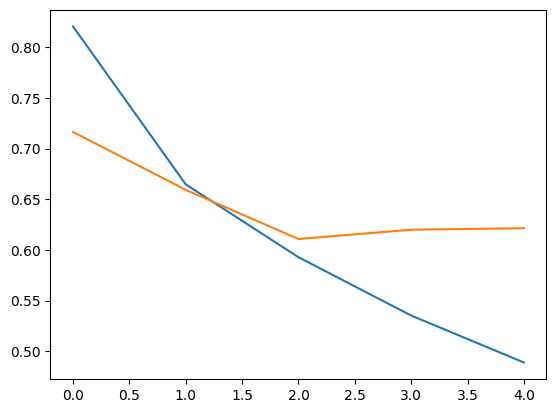

In [14]:
import seaborn

seaborn.lineplot(history.history['loss'])
seaborn.lineplot(history.history['val_loss'])

### Evaluation

In [15]:
%%time
from transformers import pipeline, TextClassificationPipeline

print("Getting Test Prediction")
pipe = pipeline('sentiment-analysis',model=model,tokenizer=tokenizer,device=1)
prediction = pipe(data['test']['text'])
pred_labels = [model.config.label2id[x['label']] for x in prediction]

actual_labels = data['test']['labels']

Getting Test Prediction
CPU times: user 26min 34s, sys: 5.18 s, total: 26min 39s
Wall time: 26min 40s


**Computing F1-Score, Precision, Recall and Accuracy of the Model**

In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,pred_labels,average='weighted'))
print("Precision-Score",precision_score(actual_labels,pred_labels,average='weighted'))
print("Recall-Score",recall_score(actual_labels,pred_labels,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,pred_labels))

F1-Score 0.7512463708233418
Precision-Score 0.7593959856529615
Recall-Score 0.7513838748495788
accuracy_Score 0.7513838748495788


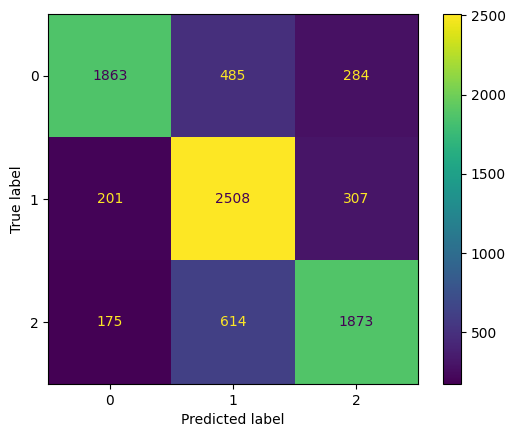

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,pred_labels,num_classes=3).numpy())
cmd.plot()